In [1]:
using Plots
using Statistics
using LinearAlgebra
using JSON

include("readclassjson.jl");

### Problem 13.1950, Part B

$A=\left[\begin{array}{cccc}
0.5 & 0.7 & -0.9 & -0.5 \\
0.4 & -0.7 & 0.1 & 0.3 \\
0.7 & 0.0 & -0.6 & 0.1 \\
0.4 & -0.1 & 0.8 & -0.5
\end{array}\right], \quad B=\left[\begin{array}{l}
1 \\
1 \\
0 \\
0
\end{array}\right], \quad x_{\mathrm{des}}=\left[\begin{array}{c}
0.8 \\
2.3 \\
-0.7 \\
-0.3
\end{array}\right]$


We can now relate vector $x(t)$ to vector $u$ via $x(t) = C_tu$. To achieve a desired x value, we know that $x_{des}$ must lie in the range of $C_t$ - otherwise no input $u$ could produce that output. Since $C_t$ grows with each time step, we can simply compute $C_t$ with the given A and B and determine if $x_{des} \in range(C_t)$. 
    
More generally, for any $x_{\mathrm{des}} \in \mathbb{R}^{4}$, we need all $x_{\mathrm{des}}$ to be in the range of $C_t$. Therefore the minimum T to achieve that is the first T for which the rank of $C_t$ is 4, since rank is the dimension of the range. Then the columns of $C_t$ will span $R^4$ and can produce any 4 dimensional desired output.
    

Starting with the specific case

In [2]:
A = [0.5 0.7 -0.9 -0.5 ; 0.4 -0.7 0.1 0.3; 0.7 0.0 -0.6 0.1; 0.4 -0.1 0.8 -0.5]
B = [1;1;0;0]
xdes = [0.8; 2.3;-0.7;-0.3]

4-element Array{Float64,1}:
  0.8
  2.3
 -0.7
 -0.3

In [19]:
function Ct(t)
    reduce(hcat, [A^i * B for i in range(0, stop=t-1)])
end

Ct (generic function with 1 method)

In [22]:
for t = 1:5
    C = Ct(t)
    println(t, rank(C) == rank([C xdes]))
end

1false
2true
3true
4true
5true


Therefore T = 2 is the smallest T for which $x_{des}$ is a possible output.

In [23]:
C2 = Ct(2)

4×2 Array{Float64,2}:
 1.0   1.2
 1.0  -0.3
 0.0   0.7
 0.0   0.3

To find the inputs, we can use the left inverse of $C_2$ (which should be exact given $x_{des} \in R(C_2)$)

In [27]:
u = C2 \ xdes

2-element Array{Float64,1}:
  2.0
 -0.9999999999999997

In [29]:
isapprox(C2 * u, xdes)

true

For the general case of any $x_{des} \in R^4$

In [32]:
for t = 1:5
    println(rank(Ct(t)))
end

1
2
3
4
4


In [34]:
C4 = Ct(4)

4×4 Array{Float64,2}:
 1.0   1.2  -0.39  -0.465
 1.0  -0.3   0.85  -0.43
 0.0   0.7   0.45  -0.451
 0.0   0.3   0.92  -0.341

In [35]:
rank(C4)

4

$T = 4$ is the first time we produce a $C_T$ with rank 4, meaning its columns span the space $R^4$. Therefore $T_{min} = 4$

### Problem 13.1950, Part C

Since $T > T_{min}$ is given, we know that $x_{des} \in R(C_T)$. Since $T > T_{min}$ produces a fat matrix with full row rank, we find ourselves in a classic least norm solution scenario. We can first note that the definition of $E(T)$ is the squared L2 norm of the vector $u$. Therefore we can simply use the the least norm solution $x_{\ln }=C^{\top}\left(CC^{\top}\right)^{-1} x_{des}$ for each $T$, using the $x_{des}$ provided.

In [36]:
T = 4:30

4:30

In [37]:
xdes = [-1 ; 1 ; 0 ; 1]

4-element Array{Int64,1}:
 -1
  1
  0
  1

In [39]:
function ln(T)
    C = Ct(T)
    u = C \ xdes

    return(norm(u)^2)
end

ln (generic function with 1 method)

In [41]:
u_norms = ln.(T)

27-element Array{Float64,1}:
 8.059917397553912
 3.0115050784899995
 2.6368756923690087
 2.4931257799379205
 2.257459439954998
 2.095320755560134
 2.0246748311922445
 1.9698124753581177
 1.9153577801223929
 1.8745844621427288
 1.8453039413319832
 1.8200049770953326
 1.7976574435870412
 ⋮
 1.7499727071250208
 1.7378857306213245
 1.7273198712019857
 1.7179627943700966
 1.7095715443038204
 1.7020366690226578
 1.6952564448353313
 1.6891165131647101
 1.6835303286307122
 1.678435857589008
 1.673776283147763
 1.669499923719386

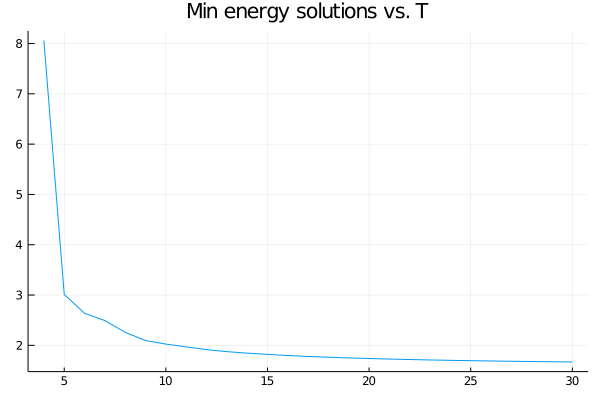

In [45]:
plot(T, u_norms, label=false)
title!("Min energy solutions vs. T")

### Problem 13.1950, Part D

*You should observe that $E_{\min }(T)$ is non-increasing in $T$. Show that this is the case in general (i.e., for any $A, B,$ and $\left.x_{\text {des }}\right)$*

First, we can look at the problem intuitively. For E(T) to be non-increasing, it can either be constant or decreasing. The input vector u adds terms as T grows, but the desired output does not change. If we can achieve the desired output in X timesteps, we should be able to complete the same task with constant energy given more time. We could simply use the same X timesteps to achieve the goal and the remaining T-X timesteps can be set to 0.

Turning to our formulation of the problem $E_min(T) = ||u||^2$ and $x_{des} = C_T u$ with $u = \begin{bmatrix} u(T-1) \\ \vdots \\ u(0)\end{bmatrix}$. Let $T_1$ be some time greater than $T_{min}$ and $T_2 > T_1$. Let $u_1 = \begin{bmatrix} u(T_1-1) \\ \vdots \\ u(0)\end{bmatrix}$ and $u_2 = \begin{bmatrix} 0 \\ \vdots \\ 0 \\ u(T_1-1) \\ \vdots \\ u(0)\end{bmatrix}$. Both vectors have the same norm since they possess the same non-zero entries. Additionally $C_{T_1} u_1 = C_{T_2} u_2$ can be easily seen since all additional entries in $C_{T_2}$ are multiplied by zero. Therefore for any arbitrary $T_2 > T_1$ we can always achieve the same goal with constant energy in T. Therefore we can say in general $E_{min}(T)$ is non-increasing in T.